In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn import tree

/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()
dt = tree.DecisionTreeClassifier()
dt = dt.fit(iris.data, iris.target)

import pandas_profiling
profile = pandas_profiling.ProfileReport(iris)
profile.to_file(outputfile="analisisUnivariado.html")

## Predicción

In [5]:
iris.data[:1, :]

array([[5.1, 3.5, 1.4, 0.2]])

In [6]:
dt.predict(iris.data[:1, :])

array([0])

In [7]:
dt.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

## Gráficos de límites

In [8]:
def plot_regions(X, y, classifier):
    # Parámetros
    n_classes = 3
    plot_colors = "bry"
    res = 0.02

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        
        X = iris.data[:, pair]
        # Train
        clf = classifier.fit(X, y)

        # Gráfico de límites de decisión
        fig = plt.figure(1,figsize=(15, 12))
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                         np.arange(y_min, y_max, res))
        
        output = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
        output = output.reshape(xx.shape)
        plt.pcolormesh(xx,yy, output, cmap=plt.cm.coolwarm_r)
        
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        
        # Gráfico de puntos de entrenamiento
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
          
    plt.suptitle("Área de decisión del árbol")
    plt.legend(loc='best')
    plt.show()

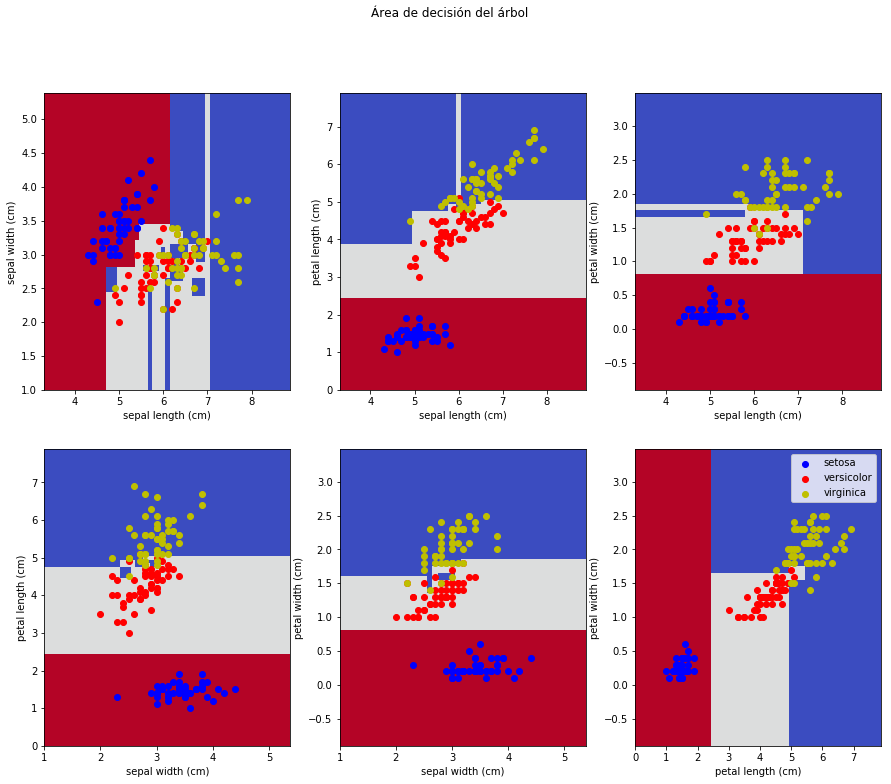

In [9]:
# Tomamos dos variables para graficar
X = iris.data
y = iris.target
new_dt = tree.DecisionTreeClassifier()
plot_regions(X=X,y=y,classifier=new_dt)

Curva ROC

In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Importo la base 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarizo la salida
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Agrego ruido al set de datos para complejizar el problema
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Mezclar y dividir los sets de datos en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Aprendizaje de predicción de una clase versus las demás
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcular curva ROC y área ROC area para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular micro-promedio de la curva ROC y área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


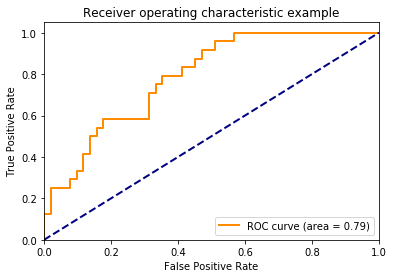

In [11]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

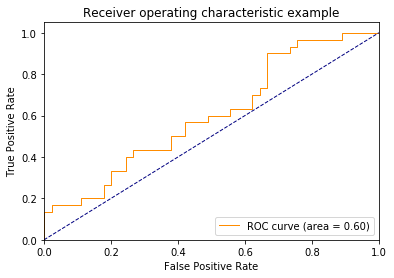

In [12]:
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()